In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.linear_model 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
heart = pd.read_csv('Heart.csv').dropna()

In [3]:
L = LabelEncoder()
heart['ChestPain'] = L.fit_transform(heart['ChestPain'])
heart['Thal'] = L.fit_transform(heart['Thal'])

In [4]:
X = np.array(heart[['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs','RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal']])
Y = np.where(heart['AHD']=='Yes',True,False)

In [5]:
X_tr , X_ts, Y_tr, Y_ts = train_test_split(X,Y)

In [6]:
ii = np.arange(20,301)
ts_b = np.ones(len(ii))
ts_r = np.ones(len(ii))
ob_b = np.ones(len(ii))
ob_r = np.ones(len(ii))
for i in range(len(ii)):

    b1 = BaggingClassifier(n_estimators=ii[i], oob_score=True)
    r1 = RandomForestClassifier(n_estimators=ii[i], oob_score=True)
    b1.fit(X_tr,Y_tr)
    r1.fit(X_tr,Y_tr)
    ob_b[i] = 1.0 - b1.oob_score_ 
    ob_r[i] = 1.0 - r1.oob_score_ 
    
    ts_b[i] = 1.0 - b1.score(X_ts,Y_ts)
    ts_r[i] = 1.0 - r1.score(X_ts,Y_ts)

C:\Users\dagar\Anaconda32\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\dagar\Anaconda32\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


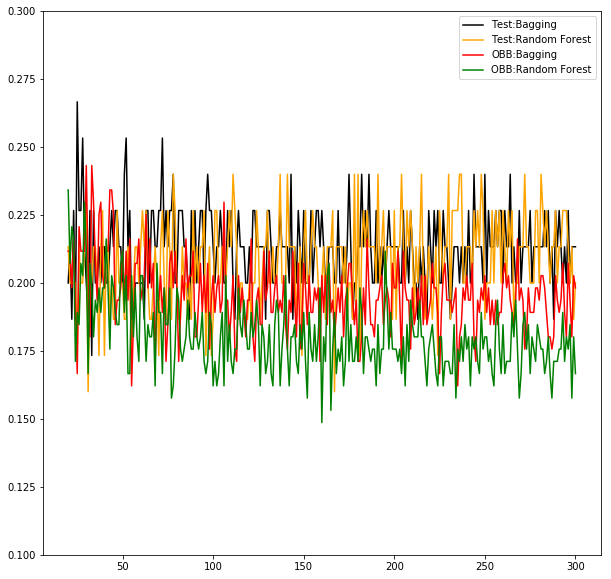

In [7]:
plt.figure(figsize=(10,10))
plt.plot(ii,ts_b,color='black',label='Test:Bagging')
plt.plot(ii,ts_r,color='orange',label='Test:Random Forest')
plt.plot(ii,ob_b,color='red',label='OBB:Bagging')
plt.plot(ii,ob_r,color='green',label='OBB:Random Forest')
plt.legend()
plt.ylim(0.1,0.3)
plt.show()

In [8]:
OJ = pd.read_csv('OJ.csv')

In [19]:
Y = np.where(OJ['Purchase']=='CH',True,False)
X = np.array(OJ[['WeekofPurchase', 'StoreID', 'PriceCH',
       'PriceMM', 'DiscCH', 'DiscMM', 'SpecialCH', 'SpecialMM', 'LoyalCH',
       'SalePriceMM', 'SalePriceCH', 'PriceDiff', 'PctDiscMM',
       'PctDiscCH', 'ListPriceDiff', 'STORE']])

In [20]:
X_tr , X_ts, Y_tr, Y_ts = train_test_split(X,Y)

In [21]:
ii = np.arange(20,200)
error_p = np.ones(len(ii))
error_s = np.ones(len(ii))
error_m = np.ones(len(ii))
for i in range(len(ii)):
    r = RandomForestClassifier(n_estimators=ii[i])
    r.fit(X_tr,Y_tr)
    error_s[i] = 1.0 - r.score(X_ts,Y_ts)
    
    r1 = RandomForestClassifier(n_estimators=ii[i],max_features=None)
    r1.fit(X_tr,Y_tr)
    error_p[i] = 1.0 - r1.score(X_ts,Y_ts)
    
    r2 = RandomForestClassifier(n_estimators=ii[i], max_features=0.5)
    r2.fit(X_tr,Y_tr)
    error_m[i] = 1.0 - r2.score(X_ts,Y_ts)

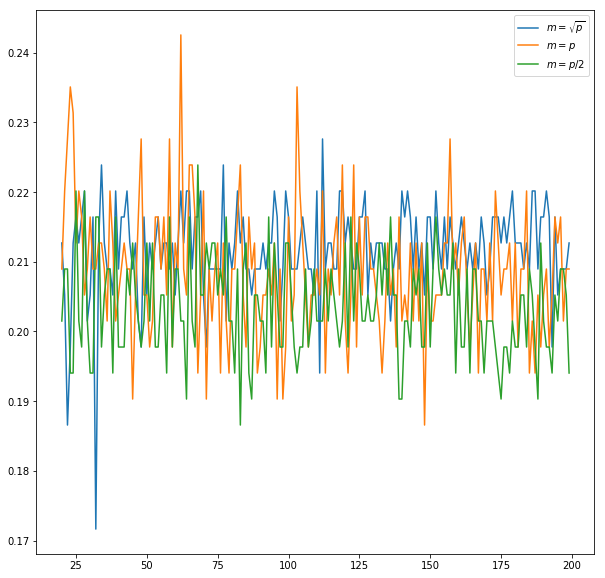

In [22]:
plt.figure(figsize=(10,10))
plt.plot(ii,error_s,label='$m=\sqrt{p}$')
plt.plot(ii,error_p,label='$m=p$')
plt.plot(ii,error_m,label='$m=p/2$')
plt.legend()
plt.show()

In [63]:
X_tr , X_ts, Y_tr, Y_ts = train_test_split(X,Y)

In [90]:
LR = sklearn.linear_model.LogisticRegression()
CT = DecisionTreeClassifier(max_depth=9)
RF = RandomForestClassifier(n_estimators=100)
LD = LinearDiscriminantAnalysis()
LR.fit(X_tr,Y_tr)
CT.fit(X_tr,Y_tr)
RF.fit(X_tr,Y_tr)
LD.fit(X_tr,Y_tr)
ELR = roc_auc_score(Y_ts,LR.predict_proba(X_ts)[:,1])
ECT = roc_auc_score(Y_ts,CT.predict_proba(X_ts)[:,1])
ERF = roc_auc_score(Y_ts,RF.predict_proba(X_ts)[:,1])
ELD = roc_auc_score(Y_ts,LD.predict_proba(X_ts)[:,1])

C:\Users\dagar\Anaconda32\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Area bajo la curva, en curvas ROC

In [91]:
print('Logistic Regression =',ELR, 'Classification Tree =' ,ECT, 'Random Forest =' ,ERF, 'LDA =' ,ELD)

Logistic Regression = 0.891391420445 Classification Tree = 0.78231845359 Random Forest = 0.843182213966 LDA = 0.891565565682


In [92]:
PLR, RLR, _ = precision_recall_curve(Y_ts,LR.predict_proba(X_ts)[:,1])
PCT, RCT, _ = precision_recall_curve(Y_ts,CT.predict_proba(X_ts)[:,1])
PRF, RRF, _ = precision_recall_curve(Y_ts,RF.predict_proba(X_ts)[:,1])
PLD, RLD, _ = precision_recall_curve(Y_ts,LD.predict_proba(X_ts)[:,1])

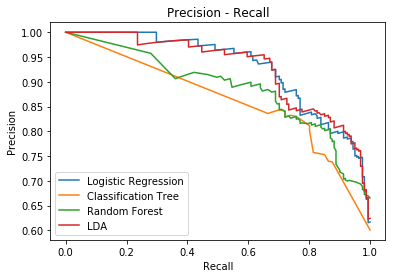

In [93]:
plt.plot(RLR,PLR,label='Logistic Regression')
plt.plot(RCT,PCT,label='Classification Tree')
plt.plot(RRF,PRF,label='Random Forest')
plt.plot(RLD,PLD,label="LDA")
plt.title("Precision - Recall")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

Al observar el area bajo las curvas ROC, se puede evidenciar que el modelo de Logistic Regession y LDA, son capaces de modelar de mejor forma el set de datos. Por otra parte, en la grafica Precision-Recall se puede evidenciar que estos dos modelos cuentan con una grafica mas cercana a la esquina superior izquierda, lo que da cuenta de que modela mejor el set de datos. Cabe mencionar, que la profundidad del Clasification Tree y la cantidad de arboles en el Random Forest, se obtuvo a partir de este o ejercicios anteriores